In [1]:
using Random
using Plots
using DelimitedFiles, DataFrames
Random.seed!(0);

In [2]:
FL_FE = readdlm("FLFreeEnergy.txt")
FL_time = readdlm("FLFETime.txt")
ADVI_FE = readdlm("ADVIFreeEnergy.txt")
ADVI_time = readdlm("ADVIFETime.txt")
;

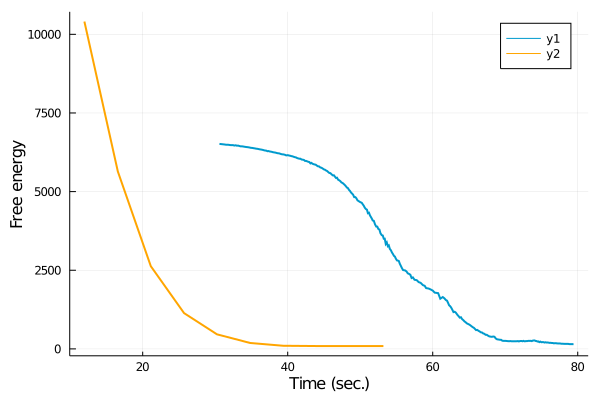

In [4]:
p = plot(FL_time, FL_FE, color=:deepskyblue3, lw=2)
ylabel!("Free energy")
xlabel!("Time (sec.)")
plot!(ADVI_time, ADVI_FE, color=:orange, lw=2)
p

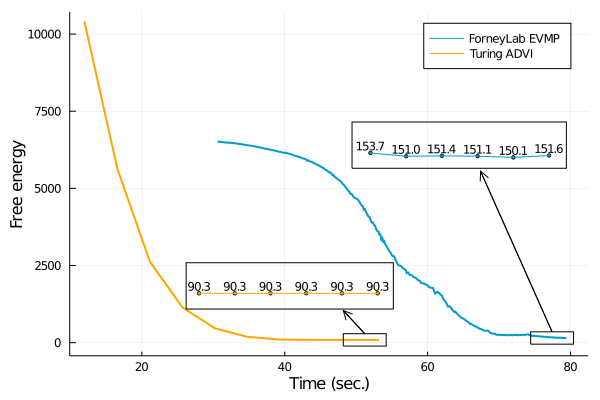

In [169]:
function rectangle_from_coords(xb,yb,xt,yt)
    [
        xb  yb
        xt  yb
        xt  yt
        xb  yt
        xb  yb
        NaN NaN
    ]
end

p = plot(FL_time, FL_FE, color=:deepskyblue3, lw=2, label="ForneyLab EVMP")
ylabel!("Free energy")
xlabel!("Time (sec.)")
plot!(ADVI_time, ADVI_FE, color=:orange, lw=2, label="Turing ADVI")

ADVI_rects = rectangle_from_coords(ADVI_time[end]-5, ADVI_FE[end]-200, ADVI_time[end]+1, ADVI_FE[end]+200)
plot!(ADVI_rects[:,1], ADVI_rects[:,2], color=:black, label=false)
quiver!([ADVI_time[end]-2],[ADVI_FE[end]+200],quiver=([-3],[750]),color=:black)

ADVI_large_rects = rectangle_from_coords(ADVI_time[end]-27, ADVI_FE[end]+1000, ADVI_time[end]+2, ADVI_FE[end]+2500)
plot!(ADVI_large_rects[:,1], ADVI_large_rects[:,2], color=:black, label=false)
scatter!([28,33,38,43,48,53],1600*ones(6),color=:orange, markersize=2, series_annotations = text.(round(ADVI_FE[end],digits=1)*ones(6), [Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8)], :bottom), label=false)
plot!([28,33,38,43,48,53],1600*ones(6),color=:orange,lw=1, label=false)


scatter!([52,57,62,67,72,77],40*FL_FE[end-5:end],color=:deepskyblue3, label=false,  markersize=2, series_annotations=text.(round.(FL_FE[end-5:end],digits=1),[Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8), Plots.font("Sans", 8)], :bottom))
plot!([52,57,62,67,72,77],40*FL_FE[end-5:end],color=:deepskyblue3, label=false)

FL_rects = rectangle_from_coords(FL_time[end]-5, FL_FE[end]-200, FL_time[end]+1, FL_FE[end]+200)
plot!(FL_rects[:,1], FL_rects[:,2], color=:black, label=false)
quiver!([FL_time[end]-2],[FL_FE[end]+200],quiver=([-10],[5200]),color=:black)

FL_large_rects = rectangle_from_coords(FL_time[end]-30, FL_FE[end]+5500, FL_time[end], FL_FE[end]+7000)
plot!(FL_large_rects[:,1], FL_large_rects[:,2], color=:black, label=false)

png(p, "BLDS-FE-Compare.png")
p